In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import all the libraries

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score

%matplotlib inline

# Import obesity csv file

In [8]:
obesity = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/obesity/Obesity Classification.csv')

In [9]:
obesity.shape

(108, 7)

In [10]:
obesity.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [11]:
obesity.tail()

,ID,Age,Gender,Height,Weight,BMI,Label
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight
107,110,31,Male,190,20,8.3,Underweight


# EDA and preprocessing

In [12]:
obesity.drop(['ID'], axis=1, inplace = True)

In [13]:
obesity.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

In [14]:
obesity.isna().sum()

Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [15]:
num_var = ['Age', 'Height', 'Weight', 'BMI']

<Axes: xlabel='Gender', ylabel='count'>

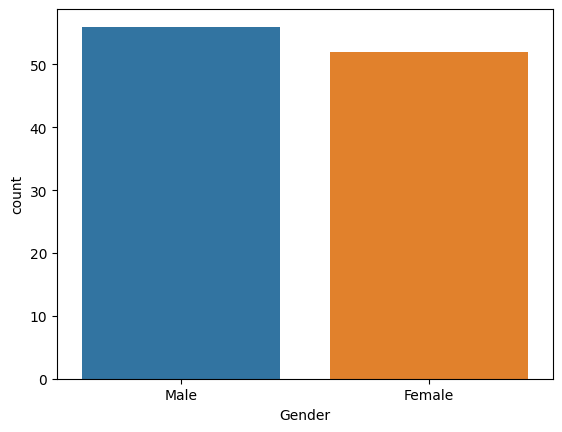

In [16]:
sns.countplot(x='Gender', data = obesity)

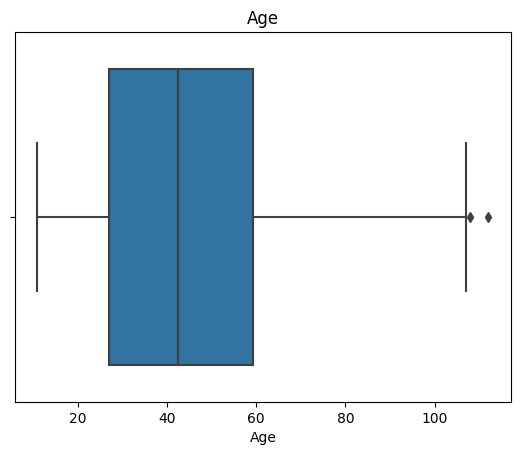

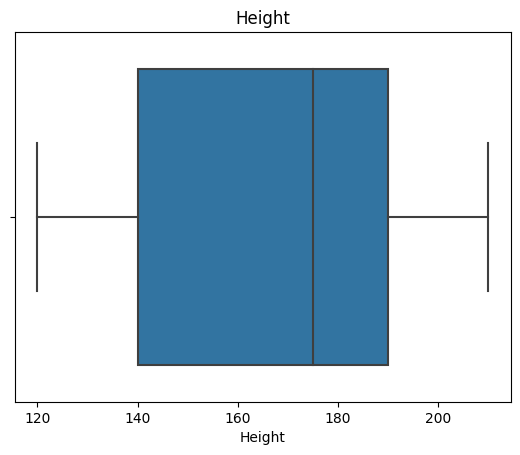

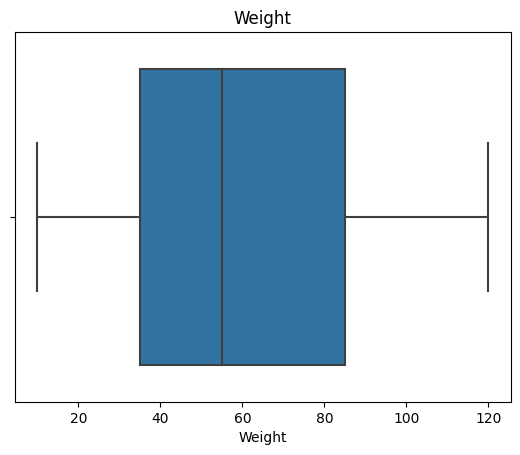

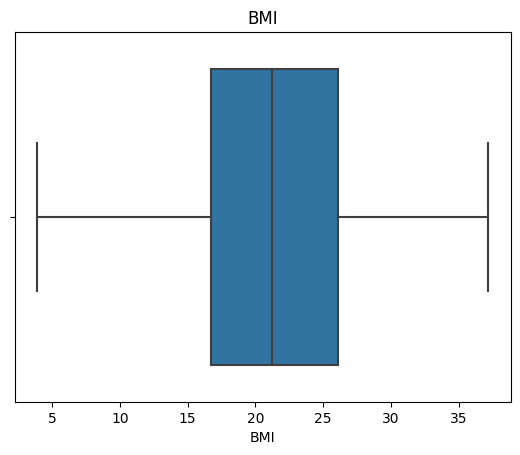

In [17]:
for i in num_var:
  plt.title(i)
  sns.boxplot(x= obesity[i])
  plt.show()

In [18]:
obesity[obesity['Age']> 100]

,Age,Gender,Height,Weight,BMI,Label
27,103,Female,130,30,13.3,Underweight
28,108,Male,210,120,37.2,Obese
55,102,Female,130,75,25.0,Overweight
56,107,Male,210,105,28.9,Obese
57,112,Female,120,85,27.5,Overweight


In [19]:
obesity['Label'].value_counts()

Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: Label, dtype: int64

In [20]:
obesity['Gender']=obesity['Gender'].map({'Female':0, 'Male':1})
obesity['Label'] = obesity['Label'].map({'Underweight':0,'Normal Weight':1 ,'Overweight':2, 'Obese':3})

In [21]:
obesity.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,1
1,30,0,160,60,22.5,1
2,35,1,180,90,27.3,2
3,40,0,150,50,20.0,0
4,45,1,190,100,31.2,3


# Train-test split

In [22]:
X = obesity.drop(['Label'], axis = 1)
y =obesity['Label']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 67)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 5)
(33, 5)
(75,)
(33,)


# model building

## Evaluation Matrix

In [25]:
def eval_metric(y_train, y_train_pred, y_test, y_test_pred):
  print("The train accuracy score is",accuracy_score(y_train,y_train_pred))
  print("The test accuracy score is",accuracy_score(y_test,y_test_pred))
  print(''' --------------------------------------------
                Train Report
-------------------------------------------- ''')
  print("The confusion matrix  is\n",confusion_matrix(y_train,y_train_pred))
  print("The classification report is\n",classification_report(y_train,y_train_pred))
  print(''' --------------------------------------------
                Test Report
-------------------------------------------- ''')
  print("The confusion matrix  is\n",confusion_matrix(y_test,y_test_pred))
  print("The classification report  is\n",classification_report(y_test,y_test_pred))

## Logistic Regression

In [26]:
lr = LogisticRegression()

In [27]:
lr.fit(X_train, y_train)

lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

eval_metric(y_train, lr_train_pred, y_test, lr_test_pred)

The train accuracy score is 0.8266666666666667
The test accuracy score is 0.6666666666666666
 --------------------------------------------
                Train Report
-------------------------------------------- 
The confusion matrix  is
 [[31  1  0  0]
 [ 1 17  1  0]
 [ 0  2 10  3]
 [ 0  0  5  4]]
The classification report is
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.85      0.89      0.87        19
           2       0.62      0.67      0.65        15
           3       0.57      0.44      0.50         9

    accuracy                           0.83        75
   macro avg       0.75      0.74      0.75        75
weighted avg       0.82      0.83      0.82        75

 --------------------------------------------
                Test Report
-------------------------------------------- 
The confusion matrix  is
 [[10  5  0  0]
 [ 0  9  1  0]
 [ 0  1  3  1]
 [ 0  0  3  0]]
The classification report  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## SVM

In [28]:
svc = SVC()

In [29]:
svc.fit(X_train,y_train)

svc_train_pred = svc.predict(X_train)
svc_test_pred =svc.predict(X_test)

eval_metric(y_train, svc_train_pred, y_test, svc_test_pred)

The train accuracy score is 0.8666666666666667
The test accuracy score is 0.8181818181818182
 --------------------------------------------
                Train Report
-------------------------------------------- 
The confusion matrix  is
 [[31  1  0  0]
 [ 0 17  2  0]
 [ 0  5  8  2]
 [ 0  0  0  9]]
The classification report is
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.74      0.89      0.81        19
           2       0.80      0.53      0.64        15
           3       0.82      1.00      0.90         9

    accuracy                           0.87        75
   macro avg       0.84      0.85      0.83        75
weighted avg       0.87      0.87      0.86        75

 --------------------------------------------
                Test Report
-------------------------------------------- 
The confusion matrix  is
 [[15  0  0  0]
 [ 0  9  1  0]
 [ 0  3  1  1]
 [ 0  0  1  2]]
The classification report  

## Decision Tree

In [30]:
dt = DecisionTreeClassifier()

In [31]:
dt.fit(X_train, y_train)

dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

eval_metric(y_train, dt_train_pred, y_test, dt_test_pred)

The train accuracy score is 1.0
The test accuracy score is 1.0
 --------------------------------------------
                Train Report
-------------------------------------------- 
The confusion matrix  is
 [[32  0  0  0]
 [ 0 19  0  0]
 [ 0  0 15  0]
 [ 0  0  0  9]]
The classification report is
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00         9

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

 --------------------------------------------
                Test Report
-------------------------------------------- 
The confusion matrix  is
 [[15  0  0  0]
 [ 0 10  0  0]
 [ 0  0  5  0]
 [ 0  0  0  3]]
The classification report  is
               precision   

## K nearest Neighbour

In [33]:
kn = KNeighborsClassifier()

In [34]:
kn.fit(X_train, y_train)

kn_train_pred = kn.predict(X_train)
kn_test_pred = kn.predict(X_test)

eval_metric(y_train, kn_train_pred, y_test, kn_test_pred)

The train accuracy score is 0.9066666666666666
The test accuracy score is 0.7575757575757576
 --------------------------------------------
                Train Report
-------------------------------------------- 
The confusion matrix  is
 [[29  3  0  0]
 [ 0 17  2  0]
 [ 0  2 13  0]
 [ 0  0  0  9]]
The classification report is
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        32
           1       0.77      0.89      0.83        19
           2       0.87      0.87      0.87        15
           3       1.00      1.00      1.00         9

    accuracy                           0.91        75
   macro avg       0.91      0.92      0.91        75
weighted avg       0.92      0.91      0.91        75

 --------------------------------------------
                Test Report
-------------------------------------------- 
The confusion matrix  is
 [[11  4  0  0]
 [ 0  8  2  0]
 [ 0  0  4  1]
 [ 0  0  1  2]]
The classification report  

## Random Forest

In [35]:
rf = RandomForestClassifier()

In [36]:
rf.fit(X_train, y_train)

rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

eval_metric(y_train, rf_train_pred, y_test, rf_test_pred)

The train accuracy score is 1.0
The test accuracy score is 1.0
 --------------------------------------------
                Train Report
-------------------------------------------- 
The confusion matrix  is
 [[32  0  0  0]
 [ 0 19  0  0]
 [ 0  0 15  0]
 [ 0  0  0  9]]
The classification report is
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00         9

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

 --------------------------------------------
                Test Report
-------------------------------------------- 
The confusion matrix  is
 [[15  0  0  0]
 [ 0 10  0  0]
 [ 0  0  5  0]
 [ 0  0  0  3]]
The classification report  is
               precision   

## Gradient Boost

In [37]:
gb = GradientBoostingClassifier()

In [38]:
gb.fit(X_train, y_train)

gb_train_pred = gb.predict(X_train)
gb_test_pred = gb.predict(X_test)

eval_metric(y_train, gb_train_pred, y_test, gb_test_pred)

The train accuracy score is 1.0
The test accuracy score is 1.0
 --------------------------------------------
                Train Report
-------------------------------------------- 
The confusion matrix  is
 [[32  0  0  0]
 [ 0 19  0  0]
 [ 0  0 15  0]
 [ 0  0  0  9]]
The classification report is
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00         9

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

 --------------------------------------------
                Test Report
-------------------------------------------- 
The confusion matrix  is
 [[15  0  0  0]
 [ 0 10  0  0]
 [ 0  0  5  0]
 [ 0  0  0  3]]
The classification report  is
               precision   

The best model are decision tree, random forest and gradient boost.